In [2]:
#I prefer BeautifulSoup to webscraping the data
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
#That's why we need to get the html of my Letterboxd profile
domain_of_letterboxd = "https://letterboxd.com"
profile_username = "Erdemstein"
url = domain_of_letterboxd + "/" +  "/films/"
url_page = requests.get(url)
soup = BeautifulSoup(url_page.content, 'html.parser')

In [4]:
#In the profile we can reach the data of movie_id, title, my_rating, my_like and the link of movie in Letterboxd
#I want store data as a DataFrame for convenience
def scrape_films_basic_infos(profile_username):
    dictionary_for_movies = {}
    dictionary_for_movies['movie_id'] = []
    dictionary_for_movies['title_of_movie'] = []
    dictionary_for_movies['my_rating'] = []
    dictionary_for_movies['my_like'] = []
    dictionary_for_movies['link_of_movie'] = []
    url = domain_of_letterboxd + "/" + profile_username + "/films/"
    url_page = requests.get(url)
    soup = BeautifulSoup(url_page.content, 'html.parser')

    # check number of pages
    numofpages = soup.findAll("li", {"class": "paginate-page"})
    for i in range(int(numofpages[-1].find('a').get_text().strip())):
            url = domain_of_letterboxd + "/" + profile_username + "/films/page/" + str(i+1)
            url_page = requests.get(url)
            soup = BeautifulSoup(url_page.content, 'html.parser')
            ul = soup.find("ul", {"class": "poster-list"})
            if (ul != None):
                movies = ul.find_all("li")
                for movie in movies:
                    dictionary_for_movies['movie_id'].append(movie.find('div')['data-film-id'])
                    dictionary_for_movies['title_of_movie'].append(movie.find('img')['alt'])
                    dictionary_for_movies['my_rating'].append(converting_my_ratings(movie.find('p', {"class": "poster-viewingdata"}).get_text().strip()))
                    dictionary_for_movies['my_like'].append(movie.find('span', {'class': 'like'})!=None)
                    dictionary_for_movies['link_of_movie'].append(movie.find('div')['data-target-link'])
    
        

    dataset = pd.DataFrame(dictionary_for_movies)
    return dataset

#The thing is in Letterboxd my_rating part works as a image of stars like  this "★": 1. I need a function that returns them to float
def converting_my_ratings(star_rating):
     if (star_rating == "½"):
        return 0.5
     if (star_rating == "★"):
        return 1
     if (star_rating == "★½"):
        return 1.5
     if (star_rating == "★★"):
        return 2
     if (star_rating == "★★½"):
        return 2.5
     if (star_rating == "★★★"):
        return 3
     if (star_rating == "★★★½"):
        return 3.5
     if (star_rating == "★★★★"):
        return 4
     if (star_rating == "★★★★½"):
        return 4.5
     if (star_rating == "★★★★★"):
        return 5

     else:
        return "Not Rated"

In [5]:
my_movie_dataset = scrape_films_basic_infos("Erdemstein")
my_movie_dataset

,movie_id,title_of_movie,my_rating,my_like,link_of_movie
0,784328,Oppenheimer,4.5,False,/film/oppenheimer-2023/
1,277064,Barbie,4,False,/film/barbie/
2,1023411,Black Mirror: Joan Is Awful,Not Rated,False,/film/black-mirror-joan-is-awful/
3,878854,Elemental,Not Rated,False,/film/elemental-2023/
4,564996,Murder Mystery 2,3,False,/film/murder-mystery-2/
...,...,...,...,...,...
475,51542,Jaws,4.5,False,/film/jaws/
476,343399,Three Transitions,Not Rated,False,/film/three-transitions/
477,51818,The Godfather,5,False,/film/the-godfather/
478,51355,Persona,5,False,/film/persona/


In [6]:
#As you can see I don't use the functionality of liking movies in Letterboxd, so I don'need it. Let's drop that column.
my_movie_dataset = my_movie_dataset.drop(columns=['my_like'])
my_movie_dataset

,movie_id,title_of_movie,my_rating,link_of_movie
0,784328,Oppenheimer,4.5,/film/oppenheimer-2023/
1,277064,Barbie,4,/film/barbie/
2,1023411,Black Mirror: Joan Is Awful,Not Rated,/film/black-mirror-joan-is-awful/
3,878854,Elemental,Not Rated,/film/elemental-2023/
4,564996,Murder Mystery 2,3,/film/murder-mystery-2/
...,...,...,...,...
475,51542,Jaws,4.5,/film/jaws/
476,343399,Three Transitions,Not Rated,/film/three-transitions/
477,51818,The Godfather,5,/film/the-godfather/
478,51355,Persona,5,/film/persona/


In [7]:
#Furthermore, we have missing values in my_rating part, that refers to movies I have watched but didn't rate them. I would like to remove them.
my_movie_dataset = my_movie_dataset[my_movie_dataset['my_rating'] != 'Not Rated']
my_movie_dataset.reset_index(drop=True, inplace=True)
my_movie_dataset

,movie_id,title_of_movie,my_rating,link_of_movie
0,784328,Oppenheimer,4.5,/film/oppenheimer-2023/
1,277064,Barbie,4,/film/barbie/
2,564996,Murder Mystery 2,3,/film/murder-mystery-2/
3,731222,Bottoms,4,/film/bottoms/
4,242285,Puss in Boots: The Last Wish,5,/film/puss-in-boots-the-last-wish/
...,...,...,...,...
303,51600,One Flew Over the Cuckoo's Nest,4,/film/one-flew-over-the-cuckoos-nest/
304,51542,Jaws,4.5,/film/jaws/
305,51818,The Godfather,5,/film/the-godfather/
306,51355,Persona,5,/film/persona/


In [8]:
#Now I want to add some extra informations by using every link_of_movie in my profie. Start with average_rating of movie by Letterboxd users.
def average_rating(my_movie_dataset):
    average_rating_of_movies = {}
   
    average_rating_of_movies['average_rating'] = []
    
    for link in my_movie_dataset["link_of_movie"]:
        print(my_movie_dataset[my_movie_dataset["link_of_movie"] == link]['title_of_movie'].values[0]+' scraping completed')
        
        urlofmovie = domain_of_letterboxd + link
        urlofpage = requests.get(urlofmovie)
        soup_movie = BeautifulSoup(urlofpage.content, 'html.parser')
        
        
        for sc in soup_movie.findAll("script"):
            if sc.string != None:
                if "ratingValue" in sc.string:
                    rating = sc.string.split("ratingValue")[1].split(",")[0][2:]

        
        
        average_rating_of_movies['average_rating'].append(rating)
       

       
    df_avg_rating = pd.DataFrame(average_rating_of_movies)
   
    return df_avg_rating
df_avg_rating = average_rating(my_movie_dataset)

Oppenheimer scraping completed
Barbie scraping completed
Murder Mystery 2 scraping completed
Bottoms scraping completed
Puss in Boots: The Last Wish scraping completed
Black Night scraping completed
All Quiet on the Western Front scraping completed
The Menu scraping completed
Glass Onion scraping completed
Nope scraping completed
Thor: Love and Thunder scraping completed
Top Gun: Maverick scraping completed
Doctor Strange in the Multiverse of Madness scraping completed
Bodies Bodies Bodies scraping completed
Everything Everywhere All at Once scraping completed
The Batman scraping completed
Death on the Nile scraping completed
Don't Look Up scraping completed
The Black Phone scraping completed
The Last Duel scraping completed
The Guilty scraping completed
Dune scraping completed
The Power of the Dog scraping completed
Vacation Friends scraping completed
Shang-Chi and the Legend of the Ten Rings scraping completed
Free Guy scraping completed
The Suicide Squad scraping completed
Fear Stre

In [9]:
my_movie_dataset = pd.merge(my_movie_dataset, df_avg_rating, left_index=True, right_index=True)
my_movie_dataset

,movie_id,title_of_movie,my_rating,link_of_movie,average_rating
0,784328,Oppenheimer,4.5,/film/oppenheimer-2023/,4.26
1,277064,Barbie,4,/film/barbie/,3.93
2,564996,Murder Mystery 2,3,/film/murder-mystery-2/,2.42
3,731222,Bottoms,4,/film/bottoms/,3.89
4,242285,Puss in Boots: The Last Wish,5,/film/puss-in-boots-the-last-wish/,4.16
...,...,...,...,...,...
303,51600,One Flew Over the Cuckoo's Nest,4,/film/one-flew-over-the-cuckoos-nest/,4.36
304,51542,Jaws,4.5,/film/jaws/,3.98
305,51818,The Godfather,5,/film/the-godfather/,4.56
306,51355,Persona,5,/film/persona/,4.42


In [10]:
#Another thing I can add this with using this technique is genres of movies. One movie can have more than one genres.
def genre_scraping(my_movie_dataset):
    genre_of_movies = {"title_of_movie": [], "genre_of_movie": []}
    
    for link in my_movie_dataset["link_of_movie"]:
        filtered_df = my_movie_dataset[my_movie_dataset["link_of_movie"] == link]
        
        # Check if there is at least one row in the filtered DataFrame
        if not filtered_df.empty:
            title_of_movie = filtered_df["title_of_movie"].values[0]
            print(title_of_movie + " scraping completed")

            urlofmovie = domain_of_letterboxd + link
            urlofpage = requests.get(urlofmovie)
            soup_movie = BeautifulSoup(urlofpage.content, 'html.parser')

            if soup_movie.find('div', {'id': 'tab-genres'}) is not None:
                genres = [genre.get_text().strip() for genre in soup_movie.find('div', {'id': 'tab-genres'}).find('div').findAll('a')]
                genre_of_movies["title_of_movie"].append(title_of_movie[0])
                genre_of_movies["genre_of_movie"].append(genres)

    genre_dataset = pd.DataFrame(genre_of_movies)
    return genre_dataset
genre_dataset = genre_scraping(my_movie_dataset)

Oppenheimer scraping completed
Barbie scraping completed
Murder Mystery 2 scraping completed
Bottoms scraping completed
Puss in Boots: The Last Wish scraping completed
Black Night scraping completed
All Quiet on the Western Front scraping completed
The Menu scraping completed
Glass Onion scraping completed
Nope scraping completed
Thor: Love and Thunder scraping completed
Top Gun: Maverick scraping completed
Doctor Strange in the Multiverse of Madness scraping completed
Bodies Bodies Bodies scraping completed
Everything Everywhere All at Once scraping completed
The Batman scraping completed
Death on the Nile scraping completed
Don't Look Up scraping completed
The Black Phone scraping completed
The Last Duel scraping completed
The Guilty scraping completed
Dune scraping completed
The Power of the Dog scraping completed
Vacation Friends scraping completed
Shang-Chi and the Legend of the Ten Rings scraping completed
Free Guy scraping completed
The Suicide Squad scraping completed
Fear Stre

In [11]:
genre_dataset = genre_dataset.drop(columns=["title_of_movie"])
my_movie_dataset = pd.concat([my_movie_dataset, genre_dataset['genre_of_movie']], axis=1)
my_movie_dataset

,movie_id,title_of_movie,my_rating,link_of_movie,average_rating,genre_of_movie
0,784328,Oppenheimer,4.5,/film/oppenheimer-2023/,4.26,"[History, Drama]"
1,277064,Barbie,4,/film/barbie/,3.93,"[Comedy, Fantasy, Adventure]"
2,564996,Murder Mystery 2,3,/film/murder-mystery-2/,2.42,"[Comedy, Crime]"
3,731222,Bottoms,4,/film/bottoms/,3.89,[Comedy]
4,242285,Puss in Boots: The Last Wish,5,/film/puss-in-boots-the-last-wish/,4.16,"[Animation, Family, Fantasy, Action, Comedy, A..."
...,...,...,...,...,...,...
303,51600,One Flew Over the Cuckoo's Nest,4,/film/one-flew-over-the-cuckoos-nest/,4.36,[Drama]
304,51542,Jaws,4.5,/film/jaws/,3.98,"[Adventure, Thriller, Horror]"
305,51818,The Godfather,5,/film/the-godfather/,4.56,"[Crime, Drama]"
306,51355,Persona,5,/film/persona/,4.42,[Drama]


In [12]:
#I would like to focus on directors of movies that I've watched. That's why I need to scrape that data too.
def director_scraping(my_movie_dataset):
    director_of_movies = {"title_of_movie": [], "Director": []}
    
    for link in my_movie_dataset["link_of_movie"]:
        filtered_df = my_movie_dataset[my_movie_dataset["link_of_movie"] == link]
        
        # Check if there is at least one row in the filtered DataFrame
        if not filtered_df.empty:
            title_of_movie = filtered_df["title_of_movie"].values[0]
            print(title_of_movie + " scraping completed")

            urlofmovie = domain_of_letterboxd + link
            urlofpage = requests.get(urlofmovie)
            soup_movie = BeautifulSoup(urlofpage.content, 'html.parser')

            if (soup_movie.find('div', {'id':'tab-crew'}) != None):
                for director in soup_movie.find('div', {'id':'tab-crew'}).find('div').findAll('a'):
                    director_of_movies['title_of_movie'].append(title_of_movie)
                    director_of_movies['Director'].append(director.get_text().strip())

    director_dataset = pd.DataFrame(director_of_movies)
    return director_dataset
director_dataset = director_scraping(my_movie_dataset)

Oppenheimer scraping completed
Barbie scraping completed
Murder Mystery 2 scraping completed
Bottoms scraping completed
Puss in Boots: The Last Wish scraping completed
Black Night scraping completed
All Quiet on the Western Front scraping completed
The Menu scraping completed
Glass Onion scraping completed
Nope scraping completed
Thor: Love and Thunder scraping completed
Top Gun: Maverick scraping completed
Doctor Strange in the Multiverse of Madness scraping completed
Bodies Bodies Bodies scraping completed
Everything Everywhere All at Once scraping completed
The Batman scraping completed
Death on the Nile scraping completed
Don't Look Up scraping completed
The Black Phone scraping completed
The Last Duel scraping completed
The Guilty scraping completed
Dune scraping completed
The Power of the Dog scraping completed
Vacation Friends scraping completed
Shang-Chi and the Legend of the Ten Rings scraping completed
Free Guy scraping completed
The Suicide Squad scraping completed
Fear Stre

In [13]:
# Drop duplicate rows based on 'title_of_movie', keeping the first occurrence
director_dataset= director_dataset.drop_duplicates(subset='title_of_movie', keep='first')

# Reset the index
director_dataset = director_dataset.reset_index(drop=True)
# Merge director_dataset_unique with my_movie_dataset based on 'title_of_movie'
my_movie_dataset = pd.merge(my_movie_dataset, director_dataset, on='title_of_movie', how='left')
my_movie_dataset

,movie_id,title_of_movie,my_rating,link_of_movie,average_rating,genre_of_movie,Director
0,784328,Oppenheimer,4.5,/film/oppenheimer-2023/,4.26,"[History, Drama]",Christopher Nolan
1,277064,Barbie,4,/film/barbie/,3.93,"[Comedy, Fantasy, Adventure]",Greta Gerwig
2,564996,Murder Mystery 2,3,/film/murder-mystery-2/,2.42,"[Comedy, Crime]",Jeremy Garelick
3,731222,Bottoms,4,/film/bottoms/,3.89,[Comedy],Emma Seligman
4,242285,Puss in Boots: The Last Wish,5,/film/puss-in-boots-the-last-wish/,4.16,"[Animation, Family, Fantasy, Action, Comedy, A...",Joel Crawford
...,...,...,...,...,...,...,...
303,51600,One Flew Over the Cuckoo's Nest,4,/film/one-flew-over-the-cuckoos-nest/,4.36,[Drama],Miloš Forman
304,51542,Jaws,4.5,/film/jaws/,3.98,"[Adventure, Thriller, Horror]",Steven Spielberg
305,51818,The Godfather,5,/film/the-godfather/,4.56,"[Crime, Drama]",Francis Ford Coppola
306,51355,Persona,5,/film/persona/,4.42,[Drama],Ingmar Bergman


In [14]:
#Moreover I wonder the popularity of movies that I've watched. That's why I scrape the data of how many Letterboxd users watch that movie.
def extract_watched_numbers_from_dataset(movie_dataset):
    domain_of_letterboxd = "https://letterboxd.com/"  # Replace with the correct domain
    
    watched_numbers = {'Watched_number': []}

    for link in movie_dataset["link_of_movie"]:
        try:
            print(movie_dataset[movie_dataset["link_of_movie"] == link]['title_of_movie'].values[0] + ' scraping completed')

            # Construct the URL for the "members" page
            url_stats = domain_of_letterboxd + link + "members/"
            
            # Make a request to the URL and get the HTML content
            url_stats_page = requests.get(url_stats)
            url_stats_content = url_stats_page.content
            
            # Parse the HTML content
            soup_stats = BeautifulSoup(url_stats_content, 'html.parser')
            
            # Find the <li> element with the class 'js-route-watches'
            li_element = soup_stats.find('li', class_='js-route-watches')
            
            # Extract the watched number from the 'title' attribute of the <a> tag
            watched_number_str = li_element.find('a')['title']
            
            # Remove non-numeric characters and convert to an integer
            watched_number = int(''.join(filter(str.isdigit, watched_number_str)))
            
            watched_numbers['Watched_number'].append(watched_number)
        except Exception as e:
            print(f"Error extracting watched number for {link}: {str(e)}")
            watched_numbers['Watched_number'].append(None)

    df_watched_numbers = pd.DataFrame(watched_numbers)

    return df_watched_numbers
df_watched_numbers = extract_watched_numbers_from_dataset(my_movie_dataset)

Oppenheimer scraping completed
Barbie scraping completed
Murder Mystery 2 scraping completed
Bottoms scraping completed
Puss in Boots: The Last Wish scraping completed
Black Night scraping completed
All Quiet on the Western Front scraping completed
The Menu scraping completed
Glass Onion scraping completed
Nope scraping completed
Thor: Love and Thunder scraping completed
Top Gun: Maverick scraping completed
Doctor Strange in the Multiverse of Madness scraping completed
Bodies Bodies Bodies scraping completed
Everything Everywhere All at Once scraping completed
The Batman scraping completed
Death on the Nile scraping completed
Don't Look Up scraping completed
The Black Phone scraping completed
The Last Duel scraping completed
The Guilty scraping completed
Dune scraping completed
The Power of the Dog scraping completed
Vacation Friends scraping completed
Shang-Chi and the Legend of the Ten Rings scraping completed
Free Guy scraping completed
The Suicide Squad scraping completed
Fear Stre

In [15]:

# Assuming my_movie_dataset is your DataFrame
my_movie_dataset = pd.merge(my_movie_dataset, df_watched_numbers, left_index=True, right_index = True)
# Assuming my_movie_dataset is your DataFrame
my_movie_dataset = my_movie_dataset[['movie_id', 'title_of_movie', 'my_rating', 'link_of_movie', 'average_rating', 'genre_of_movie', 'Director', 'Watched_number']]
my_movie_dataset


,movie_id,title_of_movie,my_rating,link_of_movie,average_rating,genre_of_movie,Director,Watched_number
0,784328,Oppenheimer,4.5,/film/oppenheimer-2023/,4.26,"[History, Drama]",Christopher Nolan,1892575
1,277064,Barbie,4,/film/barbie/,3.93,"[Comedy, Fantasy, Adventure]",Greta Gerwig,2768300
2,564996,Murder Mystery 2,3,/film/murder-mystery-2/,2.42,"[Comedy, Crime]",Jeremy Garelick,185553
3,731222,Bottoms,4,/film/bottoms/,3.89,[Comedy],Emma Seligman,688605
4,242285,Puss in Boots: The Last Wish,5,/film/puss-in-boots-the-last-wish/,4.16,"[Animation, Family, Fantasy, Action, Comedy, A...",Joel Crawford,1066358
...,...,...,...,...,...,...,...,...
303,51600,One Flew Over the Cuckoo's Nest,4,/film/one-flew-over-the-cuckoos-nest/,4.36,[Drama],Miloš Forman,813660
304,51542,Jaws,4.5,/film/jaws/,3.98,"[Adventure, Thriller, Horror]",Steven Spielberg,1389037
305,51818,The Godfather,5,/film/the-godfather/,4.56,"[Crime, Drama]",Francis Ford Coppola,1789732
306,51355,Persona,5,/film/persona/,4.42,[Drama],Ingmar Bergman,340130


In [16]:
#Also I wonder duration of movies that I've watched
import re
def extract_runtime_from_link(movie_dataset):
    domain_of_letterboxd = "https://letterboxd.com/"  # Replace with the correct domain
    
    runtimes = {'Runtime_minutes': []}

    for link in movie_dataset["link_of_movie"]:
        try:
            print(movie_dataset[movie_dataset["link_of_movie"] == link]['title_of_movie'].values[0] + ' scraping completed')

            # Construct the URL for the movie page
            url_movie = domain_of_letterboxd + link
            
            # Make a request to the URL and get the HTML content
            url_movie_page = requests.get(url_movie)
            url_movie_content = url_movie_page.content
            
            # Extract runtime using a regular expression
            runtime_match = re.search(r'var filmData = {.*?runTime: (\d+).*?};', str(url_movie_content))
            
            if runtime_match:
                runtime_minutes = int(runtime_match.group(1))
                runtimes['Runtime_minutes'].append(runtime_minutes)
            else:
                print(f"No runtime information found for {link}")
                runtimes['Runtime_minutes'].append(None)
        except Exception as e:
            print(f"Error extracting runtime for {link}: {str(e)}")
            runtimes['Runtime_minutes'].append(None)

    df_runtimes = pd.DataFrame(runtimes)

    return df_runtimes
df_runtimes = extract_runtime_from_link(my_movie_dataset)

Oppenheimer scraping completed
Barbie scraping completed
Murder Mystery 2 scraping completed
Bottoms scraping completed
Puss in Boots: The Last Wish scraping completed
Black Night scraping completed
All Quiet on the Western Front scraping completed
The Menu scraping completed
Glass Onion scraping completed
Nope scraping completed
Thor: Love and Thunder scraping completed
Top Gun: Maverick scraping completed
Doctor Strange in the Multiverse of Madness scraping completed
Bodies Bodies Bodies scraping completed
Everything Everywhere All at Once scraping completed
The Batman scraping completed
Death on the Nile scraping completed
Don't Look Up scraping completed
The Black Phone scraping completed
The Last Duel scraping completed
The Guilty scraping completed
Dune scraping completed
The Power of the Dog scraping completed
Vacation Friends scraping completed
Shang-Chi and the Legend of the Ten Rings scraping completed
Free Guy scraping completed
The Suicide Squad scraping completed
Fear Stre

In [17]:
df_runtimes_reset = df_runtimes.reset_index(drop=True)

# Merge the two DataFrames based on their index
my_movie_dataset = pd.concat([my_movie_dataset, df_runtimes_reset], axis=1)
my_movie_dataset

,movie_id,title_of_movie,my_rating,link_of_movie,average_rating,genre_of_movie,Director,Watched_number,Runtime_minutes
0,784328,Oppenheimer,4.5,/film/oppenheimer-2023/,4.26,"[History, Drama]",Christopher Nolan,1892575,181
1,277064,Barbie,4,/film/barbie/,3.93,"[Comedy, Fantasy, Adventure]",Greta Gerwig,2768300,114
2,564996,Murder Mystery 2,3,/film/murder-mystery-2/,2.42,"[Comedy, Crime]",Jeremy Garelick,185553,91
3,731222,Bottoms,4,/film/bottoms/,3.89,[Comedy],Emma Seligman,688605,91
4,242285,Puss in Boots: The Last Wish,5,/film/puss-in-boots-the-last-wish/,4.16,"[Animation, Family, Fantasy, Action, Comedy, A...",Joel Crawford,1066358,103
...,...,...,...,...,...,...,...,...,...
303,51600,One Flew Over the Cuckoo's Nest,4,/film/one-flew-over-the-cuckoos-nest/,4.36,[Drama],Miloš Forman,813660,133
304,51542,Jaws,4.5,/film/jaws/,3.98,"[Adventure, Thriller, Horror]",Steven Spielberg,1389037,124
305,51818,The Godfather,5,/film/the-godfather/,4.56,"[Crime, Drama]",Francis Ford Coppola,1789732,175
306,51355,Persona,5,/film/persona/,4.42,[Drama],Ingmar Bergman,340130,83


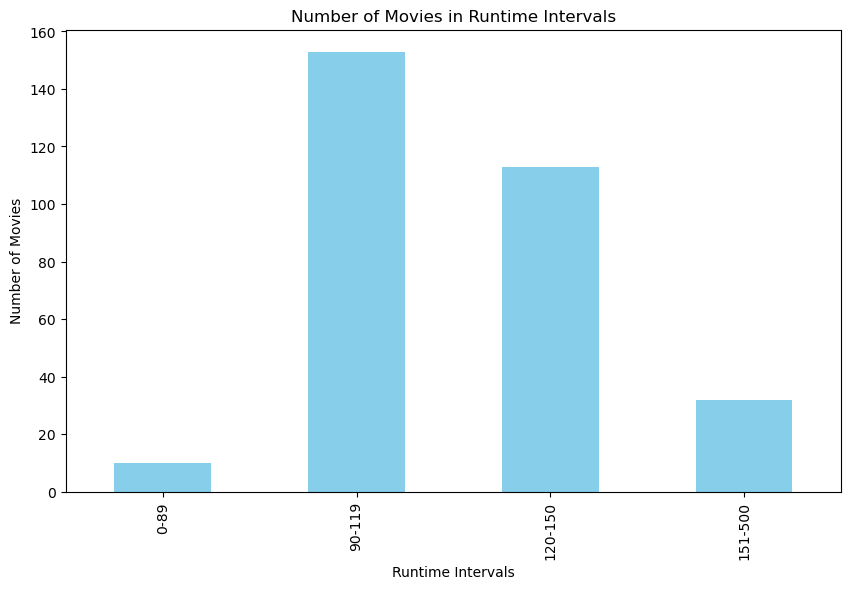

In [18]:
#Now I wonder the relationship between longevity of movies and my_rating

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'my_movie_dataset'
# If it's not, replace 'my_movie_dataset' with the actual variable name.

# Defining time intervals
intervals = [(0, 89), (90, 119), (120, 150), (151, 500)]

# Creating a new column for time intervals
my_movie_dataset['Runtime_intervals'] = pd.cut(my_movie_dataset['Runtime_minutes'], bins=[interval[0] for interval in intervals] + [500], labels=['0-89', '90-119', '120-150', '151-500'])

# Counting the number of movies in each interval
interval_counts = my_movie_dataset['Runtime_intervals'].value_counts().sort_index()

# Creating a bar chart
plt.figure(figsize=(10, 6))
interval_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Number of Movies in Runtime Intervals')
plt.xlabel('Runtime Intervals')
plt.ylabel('Number of Movies')

# Display the plot
plt.show()

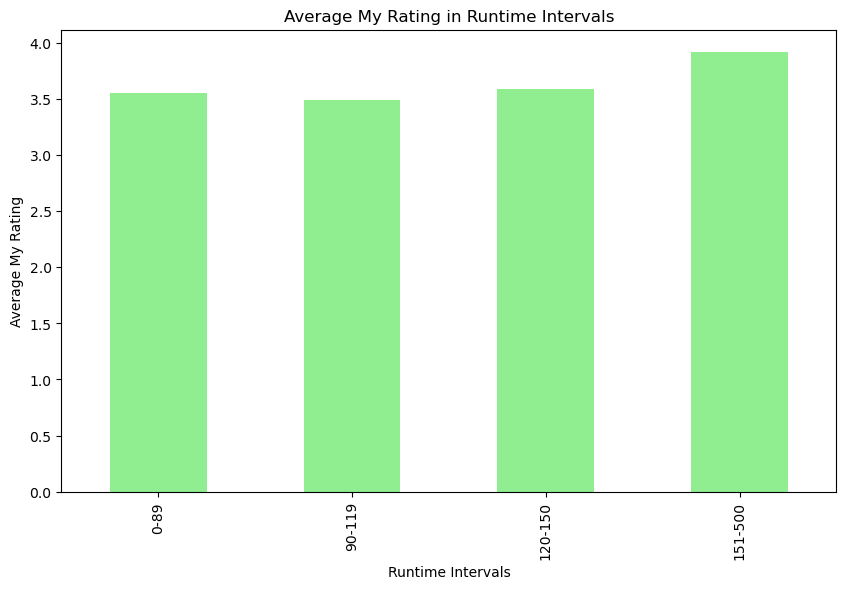

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'my_movie_dataset'
# If it's not, replace 'my_movie_dataset' with the actual variable name.

# Redefining time intervals
intervals = [(0, 89), (90, 119), (120, 150), (151, 500)]

# Creating a new column for time intervals
my_movie_dataset['Runtime_intervals'] = pd.cut(my_movie_dataset['Runtime_minutes'], bins=[interval[0] for interval in intervals] + [500], labels=['0-89', '90-119', '120-150', '151-500'])

# Calculating the average of my_rating for each interval
average_rating_by_interval = my_movie_dataset.groupby('Runtime_intervals')['my_rating'].mean()

# Creating a bar chart
plt.figure(figsize=(10, 6))
average_rating_by_interval.plot(kind='bar', color='lightgreen')

# Adding labels and title
plt.title('Average My Rating in Runtime Intervals')
plt.xlabel('Runtime Intervals')
plt.ylabel('Average My Rating')

# Display the plot
plt.show()


Chi-square value: 767.1748335544767
P-value: 0.4710666662145585
Fail to reject the null hypothesis: There is no evidence that movie duration and my rating are dependent.
This suggests that, based on the analysis, there is no statistically significant association between movie duration and your ratings.


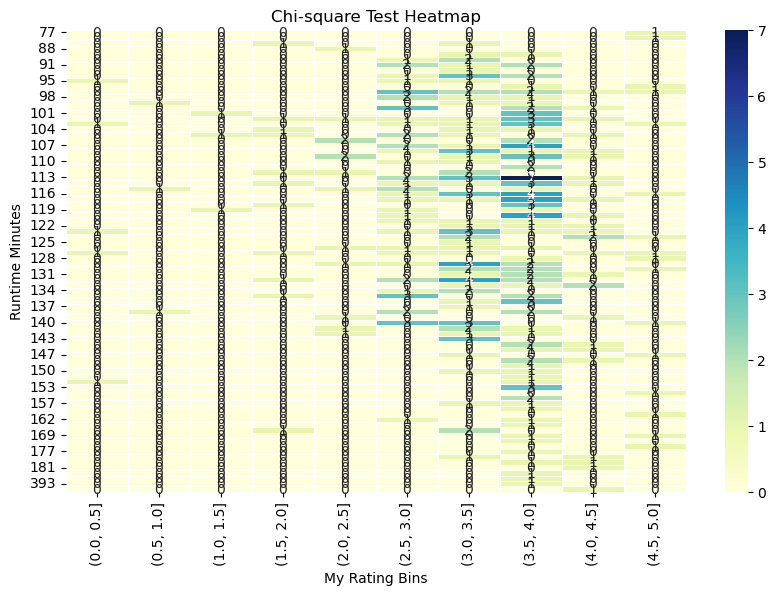

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

#My_rating and runtime_minutes

# Assuming your DataFrame is named 'my_movie_dataset'
# If it's not, replace 'my_movie_dataset' with the actual variable name.

# Define bins for my_rating
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]  # Adjust the bin edges as needed

# Create a new column with bins for my_rating
my_movie_dataset['my_rating_bins'] = pd.cut(my_movie_dataset['my_rating'], bins=bins)

# Create a contingency table
contingency_table = pd.crosstab(my_movie_dataset['Runtime_minutes'], my_movie_dataset['my_rating_bins'])

# Perform the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is evidence that movie duration and my rating are dependent.")
    print("This suggests that the duration of movies and your rating categories show a statistically significant association.")
    print("Further investigation may be warranted to understand the nature of this association.")
else:
    print("Fail to reject the null hypothesis: There is no evidence that movie duration and my rating are dependent.")
    print("This suggests that, based on the analysis, there is no statistically significant association between movie duration and your ratings.")

# Plotting a heatmap of chi-square values
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)

# Adding labels and title
plt.title('Chi-square Test Heatmap')
plt.xlabel('My Rating Bins')
plt.ylabel('Runtime Minutes')

# Display the plot
plt.show()



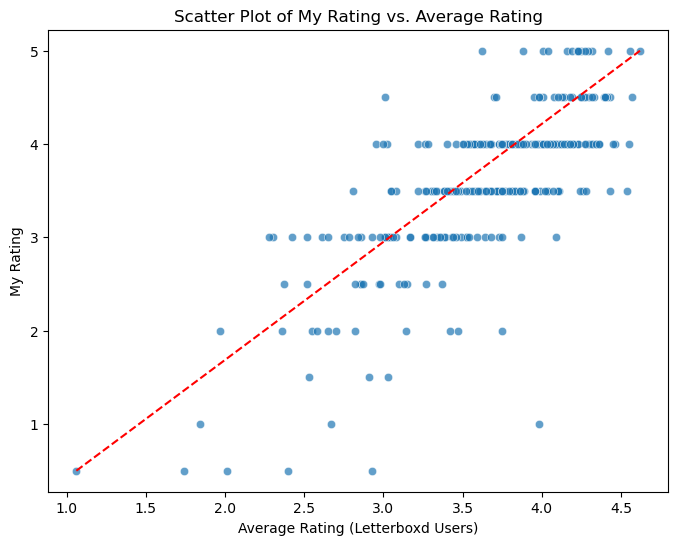

Correlation Coefficient: 0.7565873991406225
P-value: 2.1075596936996388e-58
Reject the null hypothesis: There is evidence of a correlation.
This suggests that there may be similarities between your ratings and Letterboxd users' ratings.


In [30]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'my_movie_dataset'
# If it's not, replace 'my_movie_dataset' with the actual variable name.

# Selecting the relevant columns
selected_columns = ['my_rating', 'average_rating']
subset_df = my_movie_dataset[selected_columns].copy()  # Use copy() to avoid SettingWithCopyWarning

# Convert columns to float, handling errors by setting them to NaN
subset_df['my_rating'] = pd.to_numeric(subset_df['my_rating'], errors='coerce').astype(float)
subset_df['average_rating'] = pd.to_numeric(subset_df['average_rating'], errors='coerce').astype(float)

# Removing rows with missing values
subset_df = subset_df.dropna()

# Plotting a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_df, x='average_rating', y='my_rating', alpha=0.7)

# Adding x=y line
plt.plot([min(subset_df['average_rating']), max(subset_df['average_rating'])],
         [min(subset_df['my_rating']), max(subset_df['my_rating'])],
         color='red', linestyle='--')

# Adding labels and title
plt.title('Scatter Plot of My Rating vs. Average Rating')
plt.xlabel('Average Rating (Letterboxd Users)')
plt.ylabel('My Rating')

# Display the plot
plt.show()

# Calculating the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(subset_df['my_rating'], subset_df['average_rating'])

# Output the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is evidence of a correlation.")
    print("This suggests that there may be similarities between your ratings and Letterboxd users' ratings.")
else:
    print("Fail to reject the null hypothesis: There is no evidence of a correlation.")
    print("This suggests that there may not be significant similarities between your ratings and Letterboxd users ratings.")


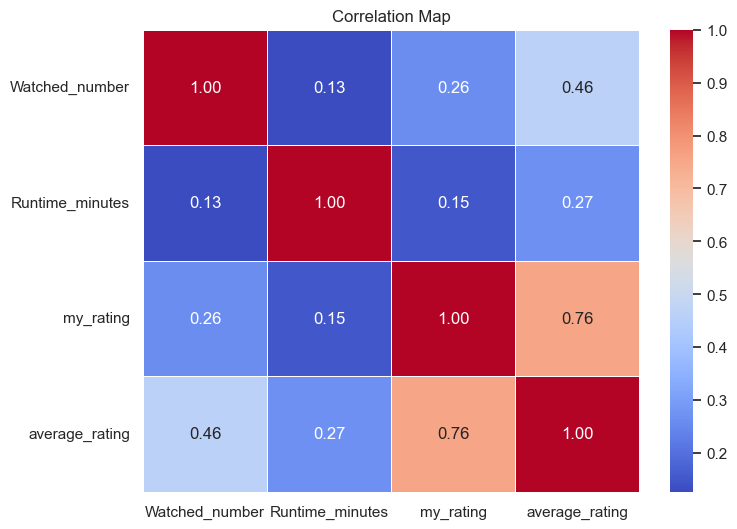

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'my_movie_dataset'
# If it's not, replace 'my_movie_dataset' with the actual variable name.

# Convert columns to numeric if they are not already
numeric_columns = ['Watched_number', 'Runtime_minutes', 'my_rating', 'average_rating']
my_movie_dataset[numeric_columns] = my_movie_dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Selecting the relevant columns
selected_columns = ['Watched_number', 'Runtime_minutes', 'my_rating', 'average_rating']
subset_df = my_movie_dataset[selected_columns]

# Creating a correlation matrix
correlation_matrix = subset_df.corr()

# Creating a heatmap using seaborn
sns.set(style="white")  # Set the background style
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title("Correlation Map")

# Display the plot
plt.show()




In [32]:
#Now I want to focus on directors. But I won't take the data of directors that I've watched only 1 movie of them. There should be at least 3 films that I've watched.

# Count the occurrences of each director
director_counts = my_movie_dataset['Director'].value_counts()

# Convert the counts to a DataFrame for better readability
director_counts_df = pd.DataFrame({'Director': director_counts.index, 'Number_of_Movies': director_counts.values})
#let's take 21 directors as a sample
top_21_directors = director_counts_df.head(21)
director_counts_df.head(21)


,Director,Number_of_Movies
0,Christopher Nolan,10
1,Guy Ritchie,8
2,David Fincher,6
3,Quentin Tarantino,6
4,Denis Villeneuve,5
5,Ridley Scott,5
6,Steven Spielberg,5
7,Martin Scorsese,4
8,Todd Phillips,4
9,Bryan Singer,3


In [33]:
#Now I wonder which directors I love more than Letterboxd users
# Assuming you already have the top_10_directors DataFrame with columns "Director" and "Number_of_Movies"
# Also assuming your my_movie_dataset DataFrame has columns "director" and "my_rating"

# Merge the datasets on the "director" column
x_data = pd.merge(my_movie_dataset, top_21_directors, left_on="Director", right_on="Director", how="inner")

# Calculate the total my_rating for each director
x_data['total_rating'] = x_data['my_rating'] * x_data['Number_of_Movies']

# Group by director and calculate the sum of total_rating and Number_of_Movies
director_avg_rating = x_data.groupby('Director').agg({'total_rating': 'sum', 'Number_of_Movies': 'sum'})

# Calculate the average rating for each director
director_avg_rating['my_average_rating'] = director_avg_rating['total_rating'] / director_avg_rating['Number_of_Movies']

# Sort the DataFrame by director name in alphabetical order
director_avg_rating_sorted_alpha = director_avg_rating.sort_index()

director_avg_rating_sorted = director_avg_rating_sorted_alpha.drop(columns = ["total_rating", "Number_of_Movies"])

director_avg_rating_sorted
# Merge the datasets on the "director" column
y_data = pd.merge(my_movie_dataset, top_21_directors, left_on="Director", right_on="Director", how="inner")

# Replace any non-numeric values in the "average_rating" column with NaN
y_data['average_rating'] = pd.to_numeric(x_data['average_rating'], errors='coerce')

# Drop rows with NaN values in the "average_rating" column
y_data = y_data.dropna(subset=['average_rating'])

# Replace any non-numeric values in the "Number_of_Movies" column with NaN
y_data['Number_of_Movies'] = pd.to_numeric(y_data['Number_of_Movies'], errors='coerce')

# Drop rows with NaN values in the "Number_of_Movies" column
y_data = y_data.dropna(subset=['Number_of_Movies'])

# Calculate the total average_rating for each director
y_data['total_average_rating'] = y_data['average_rating'] * y_data['Number_of_Movies']

# Group by director and calculate the sum of total_average_rating and Number_of_Movies
director_avg_rating_by_people = y_data.groupby('Director').agg({'total_average_rating': 'sum', 'Number_of_Movies': 'sum'})

# Calculate the average average_rating for each director
director_avg_rating_by_people['people_average_rating'] = director_avg_rating_by_people['total_average_rating'] / director_avg_rating_by_people['Number_of_Movies']

# Sort the DataFrame by director name in alphabetical order
director_avg_rating_by_people_sorted_alpha = director_avg_rating_by_people.sort_index()

# Display the sorted result
director_score = director_avg_rating_by_people_sorted_alpha[['people_average_rating']]

director_score
dataset_director = pd.merge (director_avg_rating_sorted , director_score, left_index=True, right_index=True)
dataset_director

,my_average_rating,people_average_rating
Director,,
Bryan Singer,3.666667,3.683333
Christopher Nolan,4.050000,4.029000
David Fincher,4.000000,4.065000
Denis Villeneuve,4.100000,4.064000
Edgar Wright,2.500000,3.860000
Edward Zwick,3.000000,3.236667
Greta Gerwig,3.833333,3.973333
Guy Ritchie,3.250000,3.435000
Joe Wright,2.833333,3.470000


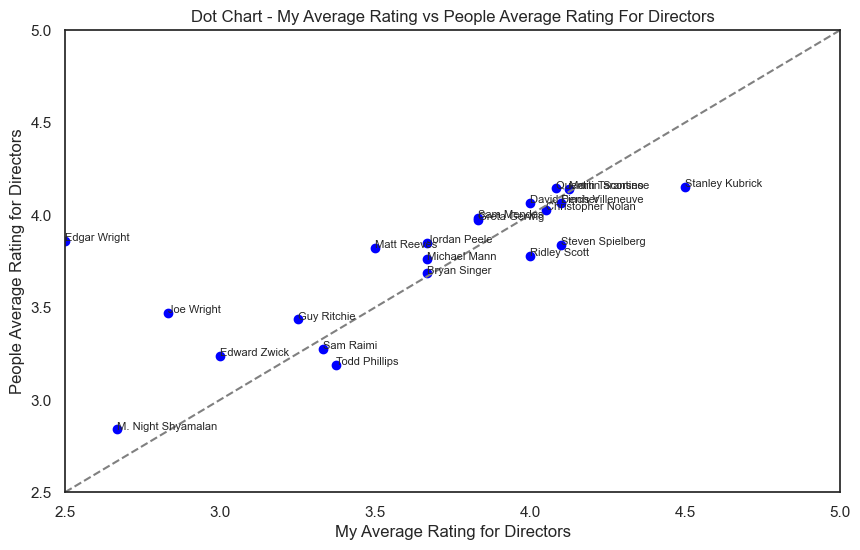

In [34]:
import matplotlib.pyplot as plt

# Assuming you have the 'dataset_director' DataFrame
# Assuming 'director' is the index of the DataFrame
# If 'director' is a column, you can use dataset_director.set_index('director') to set it as the index

# Plotting the dot chart
plt.figure(figsize=(10, 6))

# Plotting the dots for my_average_rating and people_average_rating
plt.scatter(dataset_director['my_average_rating'], dataset_director['people_average_rating'], color='blue')

# Adding labels and title
plt.title('Dot Chart - My Average Rating vs People Average Rating For Directors')
plt.xlabel('My Average Rating for Directors')
plt.ylabel('People Average Rating for Directors')

# Adding text labels for each director
for director, row in dataset_director.iterrows():
    plt.text(row['my_average_rating'], row['people_average_rating'], director, fontsize=8)

# Adding a diagonal line for reference
plt.plot([2.5, 5], [2.5, 5], linestyle='--', color='gray', label='Equality Line')

# Setting the x and y axis limits between 3 and 5
plt.xlim(2.5, 5)
plt.ylim(2.5, 5)

# Display the plot
plt.show()

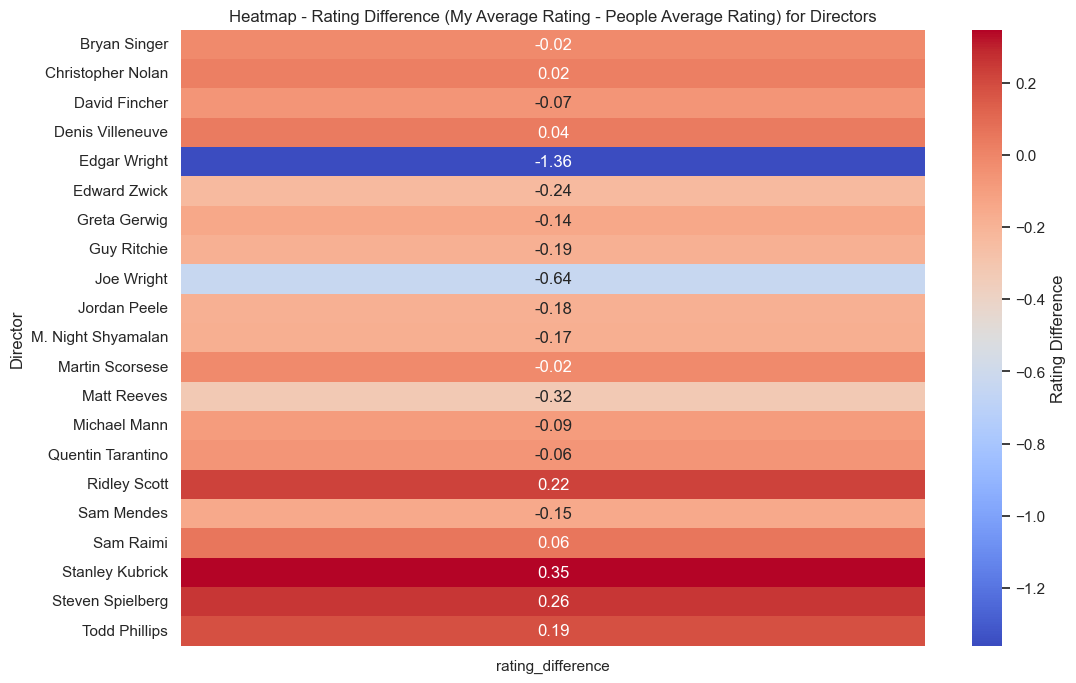

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'dataset_director' DataFrame
# Assuming 'director' is the index of the DataFrame
# If 'director' is a column, you can use dataset_director.set_index('director') to set it as the index

# Check if 'rating_difference' column already exists
if 'rating_difference' not in dataset_director.columns:
    # Create a new column for rating difference
    dataset_director['rating_difference'] = dataset_director['my_average_rating'] - dataset_director['people_average_rating']

# Handle non-numeric values in 'rating_difference' column
dataset_director['rating_difference'] = pd.to_numeric(dataset_director['rating_difference'], errors='coerce')

# Drop rows with NaN values in 'rating_difference' column
dataset_director = dataset_director.dropna(subset=['rating_difference'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dataset_director[['rating_difference']], annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Rating Difference'})
plt.title('Heatmap - Rating Difference (My Average Rating - People Average Rating) for Directors')
plt.xlabel('')
plt.ylabel('Director')
plt.show()


In [37]:
# Assuming 'my_movie_dataset' contains the original dataset
# Assuming 'dataset_director' contains the new dataset with my_average_rating and people_average_rating

# Create a dictionary to store the sum of watched numbers and count of movies for each director
director_watched_numbers = {}

# Iterate through each row in the original dataset
for index, row in my_movie_dataset.iterrows():
    director = row['Director']
    watched_number = row['Watched_number']

    # If the director is in the dictionary, update the sum and count
    if director in director_watched_numbers:
        director_watched_numbers[director]['sum'] += watched_number
        director_watched_numbers[director]['count'] += 1
    # If the director is not in the dictionary, add a new entry
    else:
        director_watched_numbers[director] = {'sum': watched_number, 'count': 1}

# Calculate the average watched number for each director
for director, values in director_watched_numbers.items():
    average_watched_number = values['sum'] / values['count']
    # Update the 'my_average_watched_number' column in the dataset_director
    dataset_director.loc[director, 'Popularity'] = average_watched_number /1000000

# Display the updated dataset_director



dataset_director.head(21)


,my_average_rating,people_average_rating,rating_difference,Popularity
Director,,,,
Bryan Singer,3.666667,3.683333,-0.016667,1.082687
Christopher Nolan,4.050000,4.029000,0.021000,1.991070
David Fincher,4.000000,4.065000,-0.065000,1.943785
Denis Villeneuve,4.100000,4.064000,0.036000,1.147003
Edgar Wright,2.500000,3.860000,-1.360000,1.776991
Edward Zwick,3.000000,3.236667,-0.236667,0.185346
Greta Gerwig,3.833333,3.973333,-0.140000,2.238051
Guy Ritchie,3.250000,3.435000,-0.185000,0.462676
Joe Wright,2.833333,3.470000,-0.636667,0.580602


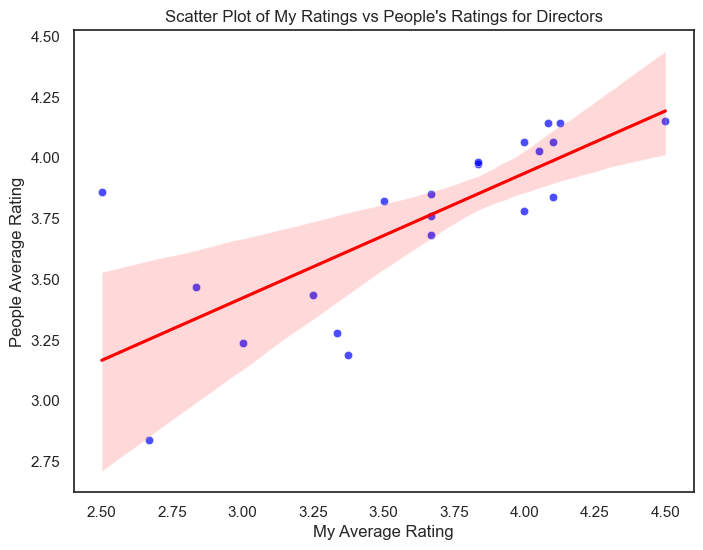

Correlation Coefficient: 0.7484546380750838
P-value: 9.521544663943177e-05
Reject the null hypothesis: There is strong evidence to suggest a correlation.
Conclusion: Your ratings and people's ratings for directors are likely correlated.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='my_average_rating', y='people_average_rating', data=dataset_director, color='blue', alpha=0.7)

# Add a regression line
sns.regplot(x='my_average_rating', y='people_average_rating', data=dataset_director, scatter=False, color='red')

# Set plot labels and title
plt.title('Scatter Plot of My Ratings vs People\'s Ratings for Directors')
plt.xlabel('My Average Rating')
plt.ylabel('People Average Rating')

# Display the plot
plt.show()

import numpy as np
from scipy.stats import pearsonr

# Extracting the relevant columns
my_ratings = dataset_director['my_average_rating']
people_ratings = dataset_director['people_average_rating']

# Removing NaN values, if any
my_ratings = my_ratings.dropna()
people_ratings = people_ratings.dropna()

# Performing the Pearson correlation test
correlation_coefficient, p_value = pearsonr(my_ratings, people_ratings)

# Output the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Set the significance level
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is strong evidence to suggest a correlation.")
    print("Conclusion: Your ratings and people's ratings for directors are likely correlated.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest a correlation.")
    print("Conclusion: Your ratings and people's ratings for directors may not be significantly correlated.")




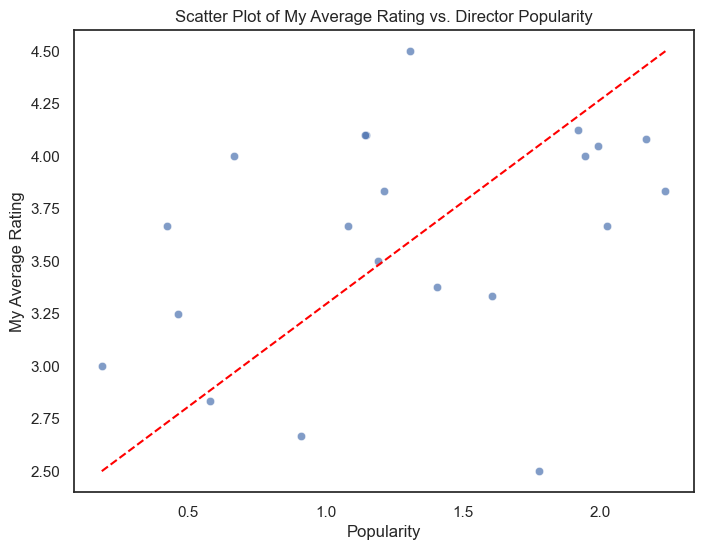

Correlation Coefficient: 0.35368451895978104
P-value: 0.11574775709546352
Fail to reject the null hypothesis: There is no evidence of a correlation.
Conclusion: Your rating for a director may not be significantly correlated with their popularity.


In [41]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the relevant columns
selected_columns = ['my_average_rating', 'Popularity']
subset_df = dataset_director[selected_columns]

# Removing rows with missing values
subset_df = subset_df.dropna()

# Plotting a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_df, x='Popularity', y='my_average_rating', alpha=0.7)

plt.plot([min(subset_df['Popularity']), max(subset_df['Popularity'])],
         [min(subset_df['my_average_rating']), max(subset_df['my_average_rating'])],
         color='red', linestyle='--')

# Adding labels and title
plt.title('Scatter Plot of My Average Rating vs. Director Popularity')
plt.xlabel('Popularity')
plt.ylabel('My Average Rating')

# Display the plot
plt.show()

# Calculating the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(subset_df['Popularity'], subset_df['my_average_rating'])

# Output the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Set the significance level
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence of a correlation.")
    print("Conclusion: Your rating for a director may be correlated with their popularity.")
else:
    print("Fail to reject the null hypothesis: There is no evidence of a correlation.")
    print("Conclusion: Your rating for a director may not be significantly correlated with their popularity.")


Mean Squared Error: 0.6980655808446911


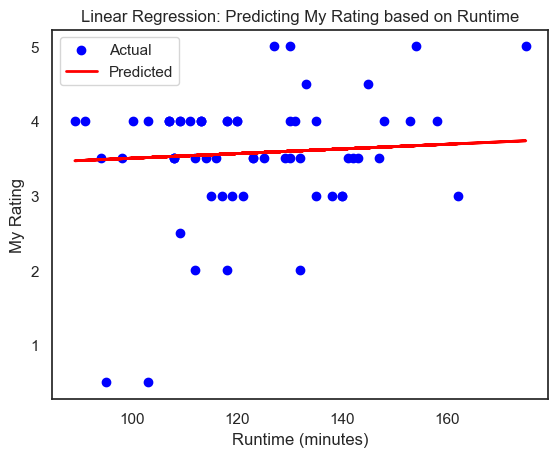

In [43]:
#Let's have a machine learning model that predicts runtime_minutes and my_rating

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming my_movie_dataset is your DataFrame

# Drop rows with missing values in either 'Runtime_minutes' or 'my_rating'
data_for_regression = my_movie_dataset.dropna(subset=['Runtime_minutes', 'my_rating'])

# Split the data into features (X) and target variable (y)
X = data_for_regression[['Runtime_minutes']]
y = data_for_regression['my_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Runtime (minutes)')
plt.ylabel('My Rating')
plt.title('Linear Regression: Predicting My Rating based on Runtime')
plt.legend()
plt.show()